<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Filter_methods_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif


In [11]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [12]:
def run_anova(k):
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    scores = selector.scores_
    anova_df = pd.DataFrame({'feature': X.columns, 'F_score': scores})
    anova_df = anova_df.sort_values(by='F_score', ascending=False)
    return anova_df


In [13]:
k = 3
anova_df = run_anova(k)
print(anova_df)
print(f"Top {k} features:", list(anova_df['feature'][:k]))

             feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502
1   sepal width (cm)    49.160040
Top 3 features: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)']


In [14]:
display(anova_df.style.background_gradient('Reds', subset=['F_score']))


,feature,F_score
2,petal length (cm),1180.161182
3,petal width (cm),960.007147
0,sepal length (cm),119.264502
1,sepal width (cm),49.160040


In [15]:
stability = {}
for k_val in [1, 2, 3, 4]:
    top_k = run_anova(k_val)
    stability[k_val] = list(top_k['feature'][:k_val])
    print(f"\nTop {k_val} features by ANOVA F-value:")
    print(top_k.head(k_val))

print("\nTop-k stability:", stability)


Top 1 features by ANOVA F-value:
             feature      F_score
2  petal length (cm)  1180.161182

Top 2 features by ANOVA F-value:
             feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147

Top 3 features by ANOVA F-value:
             feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502

Top 4 features by ANOVA F-value:
             feature      F_score
2  petal length (cm)  1180.161182
3   petal width (cm)   960.007147
0  sepal length (cm)   119.264502
1   sepal width (cm)    49.160040

Top-k stability: {1: ['petal length (cm)'], 2: ['petal length (cm)', 'petal width (cm)'], 3: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)'], 4: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']}


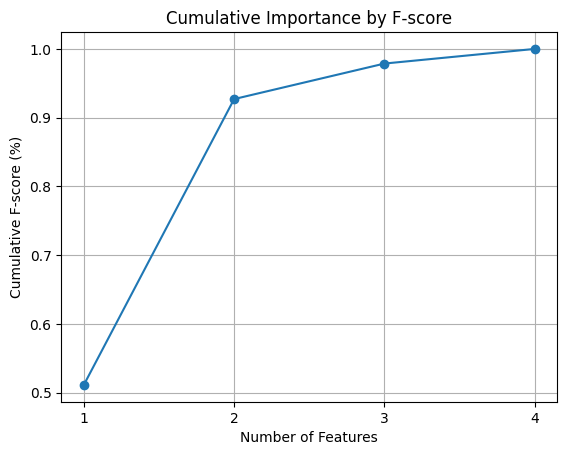

In [16]:
full_anova = run_anova(k=4)
cum = full_anova['F_score'].cumsum() / full_anova['F_score'].sum()

plt.plot(range(1, len(cum)+1), cum, marker='o')
plt.xticks(range(1, len(cum)+1))
plt.xlabel("Number of Features")
plt.ylabel("Cumulative F-score (%)")
plt.title("Cumulative Importance by F-score")
plt.grid(True)
plt.show()

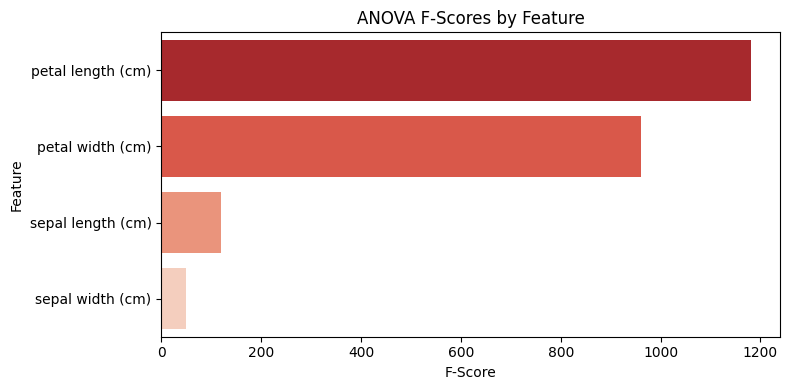

In [18]:
plt.figure(figsize=(8, 4))
sns.barplot(x='F_score', y='feature', hue='feature', data=full_anova, legend=False, palette='Reds_r')
plt.title("ANOVA F-Scores by Feature")
plt.xlabel("F-Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()